In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [27]:
dataset = pd.read_csv('kidney_disease.csv')

Exploratory Data Analysis

In [28]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [29]:
dataset.drop('id', axis = 1, inplace = True)

In [30]:
dataset.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [31]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [33]:
dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [34]:
dataset.shape

(400, 25)

In [35]:
# total percentage of NULL value in each column
(dataset.isnull().sum() / dataset.shape[0] * 100.00).round(2)

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.00
packed_cell_volume         17.50
white_blood_cell_count     26.25
red_blood_cell_count       32.50
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
class                       0.00
dtype: float64

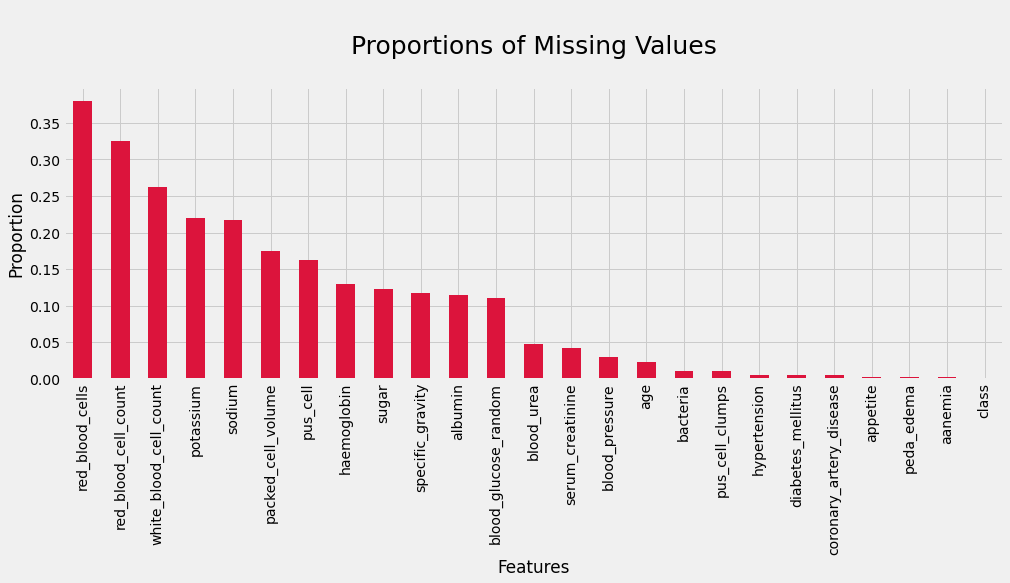

In [36]:
from matplotlib import style
style.use("fivethirtyeight")
plt.figure(figsize=(15,5))
plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black"})
missing=dataset.isna().sum().sort_values(ascending=False)
(missing/400).plot(kind="bar", color="crimson")
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [37]:
# convert object data type to numeric 
dataset['packed_cell_volume'] = pd.to_numeric(dataset['packed_cell_volume'], errors='coerce')
dataset['white_blood_cell_count'] = pd.to_numeric(dataset['white_blood_cell_count'], errors='coerce')
dataset['red_blood_cell_count'] = pd.to_numeric(dataset['red_blood_cell_count'], errors='coerce')

In [38]:
cat_col=[col for col in dataset.columns if dataset[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,dataset[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values 


pus_cell has ['normal' 'abnormal' nan] values 


pus_cell_clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary_artery_disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


peda_edema has ['no' 'yes' nan] values 


aanemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [39]:
dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dataset['coronary_artery_disease'] = dataset['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

dataset['class'] = dataset['class'].replace(to_replace = 'ckd\t', value = 'ckd')

dataset['class'] = dataset['class'].replace(to_replace = 'notckd', value = 'not ckd')


for col in cat_col:
    print('{} has {} values  '.format(col, dataset[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values  


pus_cell has ['normal' 'abnormal' nan] values  


pus_cell_clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


hypertension has ['yes' 'no' nan] values  


diabetes_mellitus has ['yes' 'no' nan] values  


coronary_artery_disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


peda_edema has ['no' 'yes' nan] values  


aanemia has ['no' 'yes' nan] values  


class has ['ckd' 'not ckd'] values  




In [40]:
dataset['class'] = dataset['class'].map({'ckd': 0, 'not ckd': 1})
dataset['class'] = pd.to_numeric(dataset['class'], errors='coerce')
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [41]:
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
num_cols = num_cols[:-1]
print("Categorical data : ",cat_cols)
print("Numerical data : ",num_cols)

Categorical data :  ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
Numerical data :  ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [42]:
dataset[cat_cols].describe(include='all')

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
count,248,335,396,396,398,398,398,399,399,399
unique,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no
freq,201,259,354,374,251,261,364,317,323,339


In [43]:
labels=["0","1"]
import seaborn as sns
import plotly.express as px
healthy_or_not = dataset['class'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=dataset['class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=px.colors.sequential.RdBu
             ,title="Not CKD vs CDK")
fig.show()

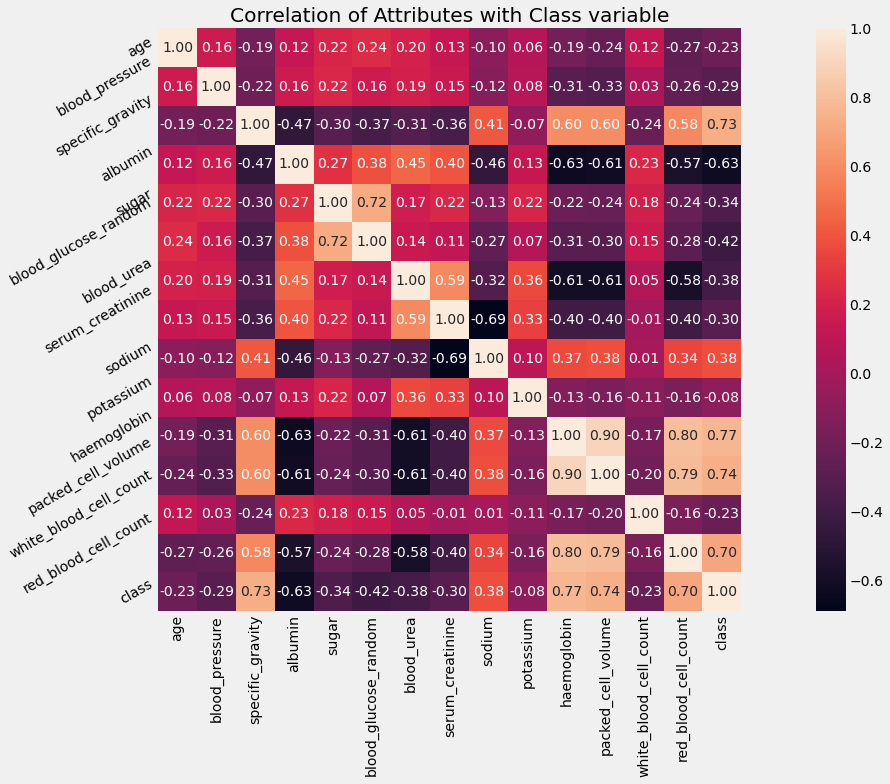

In [44]:
plt.figure(figsize=(24,10))
plt.title('Correlation of Attributes with Class variable')
correlation = dataset.corr()
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [45]:
(dataset.isnull().sum() / dataset.shape[0] * 100.00).round(2)

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
class                       0.00
dtype: float64

In [46]:
# view the categorical variables
dataset[cat_cols].head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


Spliting up dataset in Train and Test

In [47]:
X = dataset.drop(['class'], axis=1)

y = dataset['class']

In [48]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
# check the shape of X_train and X_test

X_Train.shape, X_Test.shape

((280, 24), (120, 24))

In [50]:
X_Train.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
92,71.0,70.0,1.010,3.0,0.0,normal,abnormal,present,present,219.0,82.0,3.6,133.0,4.4,10.4,33.0,5600.0,3.6,yes,yes,yes,good,no,no
223,71.0,90.0,1.010,0.0,3.0,NaN,normal,notpresent,notpresent,303.0,30.0,1.3,136.0,4.1,13.0,38.0,9200.0,4.6,yes,yes,no,good,no,no
234,37.0,100.0,1.010,0.0,0.0,abnormal,normal,notpresent,notpresent,NaN,19.0,1.3,NaN,NaN,15.0,44.0,4100.0,5.2,yes,no,no,good,no,no
232,50.0,90.0,1.015,1.0,0.0,abnormal,abnormal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,yes,no
377,64.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,97.0,27.0,0.7,145.0,4.8,13.8,49.0,6400.0,4.8,no,no,no,good,no,no


In [51]:
X_Test.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
132,50.0,NaN,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,219.0,176.0,13.8,136.0,4.5,8.6,24.0,13200.0,2.7,yes,no,no,good,yes,yes
309,51.0,60.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,129.0,25.0,1.2,139.0,5.0,17.2,40.0,8100.0,5.9,no,no,no,good,no,no
341,63.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,130.0,37.0,0.9,150.0,5.0,13.4,41.0,7300.0,4.7,no,no,no,good,no,no
196,49.0,100.0,1.010,3.0,0.0,abnormal,abnormal,notpresent,notpresent,129.0,158.0,11.8,122.0,3.2,8.1,24.0,9600.0,3.5,yes,yes,no,poor,yes,yes
246,48.0,110.0,1.015,3.0,0.0,abnormal,normal,present,notpresent,106.0,215.0,15.2,120.0,5.7,8.6,26.0,5000.0,2.5,yes,no,yes,good,no,yes


Feature Engineering- Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [52]:
(X_Train.isnull().sum() / X_Train.shape[0] * 100.00).round(2)

age                         2.50
blood_pressure              3.21
specific_gravity           12.14
albumin                    11.43
sugar                      12.50
red_blood_cells            39.64
pus_cell                   16.43
pus_cell_clumps             1.07
bacteria                    1.07
blood_glucose_random       10.71
blood_urea                  3.93
serum_creatinine            3.57
sodium                     22.86
potassium                  22.86
haemoglobin                15.00
packed_cell_volume         20.36
white_blood_cell_count     28.57
red_blood_cell_count       35.36
hypertension                0.36
diabetes_mellitus           0.36
coronary_artery_disease     0.36
appetite                    0.00
peda_edema                  0.00
aanemia                     0.00
dtype: float64

In [53]:
(X_Test.isnull().sum() / X_Test.shape[0] * 100.00).round(2)

age                         1.67
blood_pressure              2.50
specific_gravity           10.83
albumin                    11.67
sugar                      11.67
red_blood_cells            34.17
pus_cell                   15.83
pus_cell_clumps             0.83
bacteria                    0.83
blood_glucose_random       11.67
blood_urea                  6.67
serum_creatinine            5.83
sodium                     19.17
potassium                  20.00
haemoglobin                 8.33
packed_cell_volume         11.67
white_blood_cell_count     21.67
red_blood_cell_count       26.67
hypertension                0.83
diabetes_mellitus           0.83
coronary_artery_disease     0.83
appetite                    0.83
peda_edema                  0.83
aanemia                     0.83
dtype: float64

In [54]:
def mean_value_imputation(feature):
  mean = X_Train[feature].mean()
  X_Train[feature] = X_Train[feature].fillna(mean)
  mean = X_Test[feature].mean()
  X_Test[feature] = X_Test[feature].fillna(mean)
    
for col in num_cols:
  print(col)
  mean_value_imputation(col)

age
blood_pressure
specific_gravity
albumin
sugar
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count


In [55]:
def impute_mode(feature):
    mode = X_Train[feature].mode()[0]
    X_Train[feature] = X_Train[feature].fillna(mode)

    mode = X_Test[feature].mode()[0]
    X_Test[feature] = X_Test[feature].fillna(mode)
    
for col in cat_cols:
    impute_mode(col)

In [56]:
(X_Train.isnull().sum() / X_Train.shape[0] * 100.00).round(2)

age                        0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
peda_edema                 0.0
aanemia                    0.0
dtype: float64

In [57]:
(X_Test.isnull().sum() / X_Test.shape[0] * 100.00).round(2)

age                        0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
peda_edema                 0.0
aanemia                    0.0
dtype: float64

In [58]:
def mapping(feature):
  uni=X_Train[col].unique()
  # print(uni[1])
  X_Train[feature] = X_Train[feature].map({uni[0]: 0, uni[1]: 1})
  X_Train[feature] = pd.to_numeric(X_Train[feature], errors='coerce')
  X_Test[feature] = X_Test[feature].map({uni[0]: 0, uni[1]: 1})
  X_Test[feature] = pd.to_numeric(X_Test[feature], errors='coerce')
    
for col in cat_cols:
  mapping(col)

In [59]:
X_Train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
92,71.0,70.0,1.010,3.0,0.0,0,0,0,0,219.000,82.000000,3.600000,133.000000,4.400000,10.400000,33.000000,5600.0,3.600000,0,0,0,0,0,0
223,71.0,90.0,1.010,0.0,3.0,0,1,1,1,303.000,30.000000,1.300000,136.000000,4.100000,13.000000,38.000000,9200.0,4.600000,0,0,1,0,0,0
234,37.0,100.0,1.010,0.0,0.0,1,1,1,1,147.072,19.000000,1.300000,138.407407,4.775463,15.000000,44.000000,4100.0,5.200000,0,1,1,0,0,0
232,50.0,90.0,1.015,1.0,0.0,1,0,1,1,147.072,55.504461,2.676111,138.407407,4.775463,12.622689,39.188341,8448.5,4.735359,1,1,1,0,1,0
377,64.0,70.0,1.020,0.0,0.0,0,1,1,1,97.000,27.000000,0.700000,145.000000,4.800000,13.800000,49.000000,6400.0,4.800000,1,1,1,0,0,0


In [60]:
X_Test.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
132,50.0,77.264957,1.016822,1.09434,0.481132,0,1,1,1,219.0,176.0,13.8,136.0,4.5,8.6,24.0,13200.0,2.7,0,1,1,0,1,1
309,51.0,60.000000,1.020000,0.00000,0.000000,0,1,1,1,129.0,25.0,1.2,139.0,5.0,17.2,40.0,8100.0,5.9,1,1,1,0,0,0
341,63.0,70.000000,1.025000,0.00000,0.000000,0,1,1,1,130.0,37.0,0.9,150.0,5.0,13.4,41.0,7300.0,4.7,1,1,1,0,0,0
196,49.0,100.000000,1.010000,3.00000,0.000000,1,0,1,1,129.0,158.0,11.8,122.0,3.2,8.1,24.0,9600.0,3.5,0,0,1,1,1,1
246,48.0,110.000000,1.015000,3.00000,0.000000,1,1,0,1,106.0,215.0,15.2,120.0,5.7,8.6,26.0,5000.0,2.5,0,1,0,0,0,1


In [61]:
data_acc = {}
data_precision=[]
data_recall=[]
data_f1=[]
data_MAE=[]
data_logloss=[]
data_RMSE=[]

Naive Bayes Classifier

In [62]:
X_train= X_Train
X_test=X_Test

In [63]:
cols = X_train.columns

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [65]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [66]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [67]:
X_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,1.131312,-0.440140,-1.448928,1.608433,-0.442891,-0.339909,-2.045773,-2.941967,-4.531938,1.007859,0.573517,2.165852e-01,-9.499769e-01,-1.128828e-01,-8.550255e-01,-7.966364e-01,-1.161162,-1.417485,-1.271543,-1.321022,-3.424511,-0.51669,-0.5,-0.390209
1,1.131312,0.996944,-1.448928,-0.784915,2.599400,-0.339909,0.488813,0.339909,0.220656,2.184871,-0.552064,-3.225987e-01,-4.229349e-01,-2.030777e-01,1.451442e-01,-1.529773e-01,0.306341,-0.168995,-1.271543,-1.321022,0.292013,-0.51669,-0.5,-0.390209
2,-0.807185,1.715486,-1.448928,-0.784915,-0.442891,2.941967,0.488813,0.339909,0.220656,0.000000,-0.790167,-3.225987e-01,4.993145e-15,-5.340611e-16,9.145056e-01,6.194136e-01,-1.772622,0.580100,-1.271543,0.756990,0.292013,-0.51669,-0.5,-0.390209
3,-0.065995,0.996944,-0.503474,0.012867,-0.442891,2.941967,-2.045773,0.339909,0.220656,0.000000,0.000000,3.123206e-16,4.993145e-15,-5.340611e-16,-6.833302e-16,9.146946e-16,0.000000,0.000000,0.786446,0.756990,0.292013,-0.51669,2.0,-0.390209
4,0.732209,-0.440140,0.441981,-0.784915,-0.442891,-0.339909,0.488813,0.339909,0.220656,-0.701612,-0.617001,-4.632554e-01,1.158191e+00,7.377052e-03,4.528888e-01,1.263073e+00,-0.835050,0.080704,0.786446,0.756990,0.292013,-0.51669,-0.5,-0.390209


In [68]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model or creating a object
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [70]:
y_pred_proba = gnb.predict_proba(X_test)

In [71]:
y_pred_proba

array([[1.00000000e+000, 0.00000000e+000],
       [8.40562048e-056, 1.00000000e+000],
       [2.25390421e-055, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [2.21880488e-055, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [8.16215810e-056, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [8.88921863e-057, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [3.38858622e-001, 6.61141378e-001],
       [1.00000000e+000, 0.00000000e+000],
       [6.8

In [72]:
from sklearn.metrics import accuracy_score

print('Naive Bayes Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Naive Bayes Model accuracy score: 0.9583


In [73]:
data_acc['Naive Bayes'] =accuracy_score(y_test, y_pred)*100

In [74]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9536
Test set score: 0.9583


In [75]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[68  4]
 [ 1 47]]

True Positives(TP) =  68

True Negatives(TN) =  47

False Positives(FP) =  4

False Negatives(FN) =  1


<AxesSubplot:>

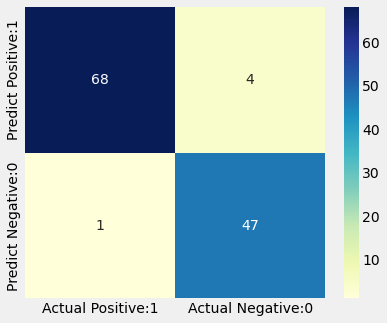

In [76]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,5))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.92      0.98      0.95        48

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [78]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [79]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print F-1 score
F1_score = 2*precision*recall / float(precision + recall)
print('F-1 Score : {0:0.4f}'.format(F1_score))

# print TPR score
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# print FPR score
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# print Specificity score
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9583
Classification error : 0.0417
Precision : 0.9444
Recall or Sensitivity : 0.9855
F-1 Score : 0.9645
True Positive Rate : 0.9855
False Positive Rate : 0.0784
Specificity : 0.9216


In [80]:
data_precision.append(precision)
data_recall.append(recall)
data_f1.append(F1_score)

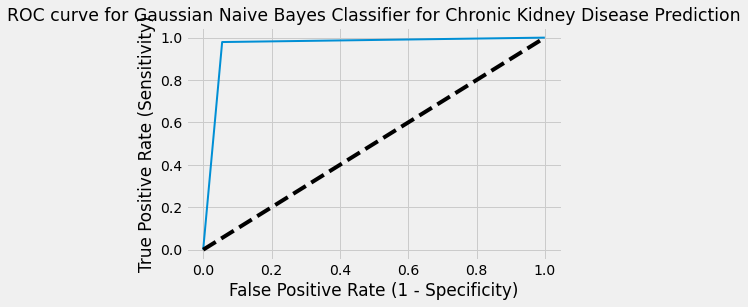

In [81]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Chronic Kidney Disease Prediction')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [82]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9618


In [83]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Log Loss:', metrics.log_loss(y_test, y_pred_proba))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.041666666666666664
Log Loss: 1.2243243022403107
Root Mean Squared Error: 0.2041241452319315


In [84]:
data_MAE.append(metrics.mean_absolute_error(y_test, y_pred))
data_logloss.append(metrics.log_loss(y_test, y_pred_proba))
data_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

K-Nearest Neighbors Classifier

In [85]:
X_train = X_Train
X_test = X_Test

In [86]:
cols = X_train.columns

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [88]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [89]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [90]:
y_pred = knn.predict(X_test)

y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [91]:
y_pred_proba = knn.predict_proba(X_test)

In [92]:
from sklearn.metrics import accuracy_score

print('KNN Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

KNN Model accuracy score: 0.9833


In [93]:
data_acc['KNN'] =accuracy_score(y_test, y_pred)*100

In [94]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [95]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(accuracy_score(y_train, knn.predict(X_train))))

print('Test set score: {:.4f}'.format(accuracy_score(y_test, knn.predict(X_test))))

Training set score: 1.0000
Test set score: 0.9833


In [96]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[70  2]
 [ 0 48]]

True Positives(TP) =  70

True Negatives(TN) =  48

False Positives(FP) =  2

False Negatives(FN) =  0


<AxesSubplot:>

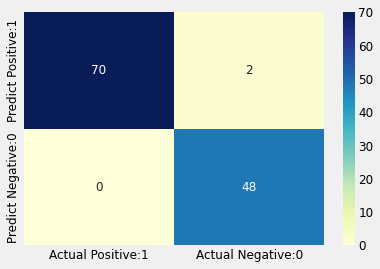

In [97]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [99]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print F-1 score
F1_score = 2*precision*recall / float(precision + recall)
print('F-1 Score : {0:0.4f}'.format(F1_score))

# print TPR score
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# print FPR score
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# print Specificity score
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9833
Classification error : 0.0167
Precision : 0.9722
Recall or Sensitivity : 1.0000
F-1 Score : 0.9859
True Positive Rate : 1.0000
False Positive Rate : 0.0400
Specificity : 0.9600


In [100]:
data_precision.append(precision)
data_recall.append(recall)
data_f1.append(F1_score)

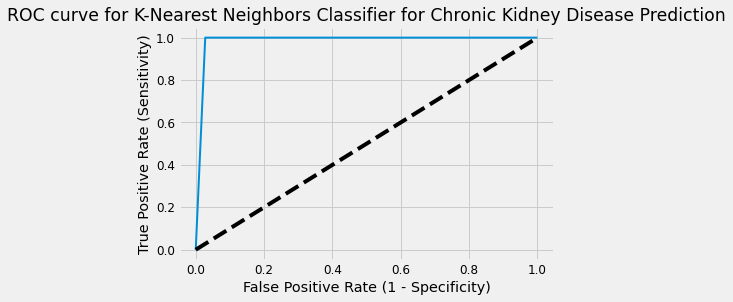

In [101]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for K-Nearest Neighbors Classifier for Chronic Kidney Disease Prediction')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [102]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9861


In [103]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Log Loss:', metrics.log_loss(y_test, y_pred_proba)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.016666666666666666
Log Loss: 0.600727556485286
Root Mean Squared Error: 0.12909944487358055


In [104]:
data_MAE.append(metrics.mean_absolute_error(y_test, y_pred))
data_logloss.append(metrics.log_loss(y_test, y_pred_proba))
data_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Decision Tree Classifier with criterion entropy

In [105]:
X_train = X_Train
X_test = X_Test

In [106]:
cols = X_train.columns

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [108]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [109]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [111]:
y_pred = clf_en.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score

print('Decision Tree Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score with criterion entropy: 0.9917


In [113]:
data_acc['Decision Tree'] =accuracy_score(y_test, y_pred)*100

In [114]:
y_pred_proba = clf_en.predict_proba(X_test)

In [115]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9917


[Text(0.5, 0.875, 'x[14] <= 0.126\nentropy = 0.946\nsamples = 280\nvalue = [178, 102]'),
 Text(0.3, 0.625, 'x[11] <= -0.358\nentropy = 0.195\nsamples = 166\nvalue = [161, 5]'),
 Text(0.2, 0.375, 'x[2] <= -0.031\nentropy = 0.706\nsamples = 26\nvalue = [21, 5]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3, 0.125, 'entropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 140\nvalue = [140, 0]'),
 Text(0.7, 0.625, 'x[2] <= -0.252\nentropy = 0.608\nsamples = 114\nvalue = [17, 97]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.8, 0.375, 'x[18] <= -0.243\nentropy = 0.194\nsamples = 100\nvalue = [3, 97]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 97\nvalue = [0, 97]')]

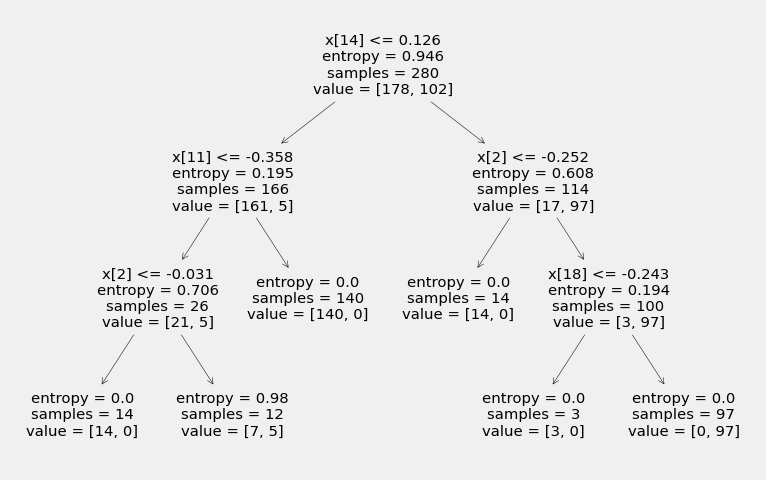

In [116]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [117]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[72  0]
 [ 1 47]]

True Positives(TP) =  72

True Negatives(TN) =  47

False Positives(FP) =  0

False Negatives(FN) =  1


<AxesSubplot:>

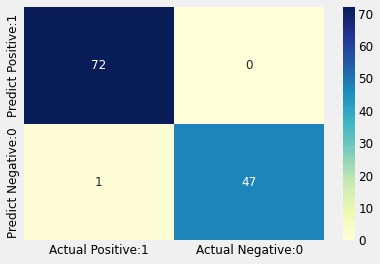

In [118]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [120]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print F-1 score
F1_score = 2*precision*recall / float(precision + recall)
print('F-1 Score : {0:0.4f}'.format(F1_score))

# print TPR score
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# print FPR score
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# print Specificity score
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9917
Classification error : 0.0083
Precision : 1.0000
Recall or Sensitivity : 0.9863
F-1 Score : 0.9931
True Positive Rate : 0.9863
False Positive Rate : 0.0000
Specificity : 1.0000


In [121]:
data_precision.append(precision)
data_recall.append(recall)
data_f1.append(F1_score)

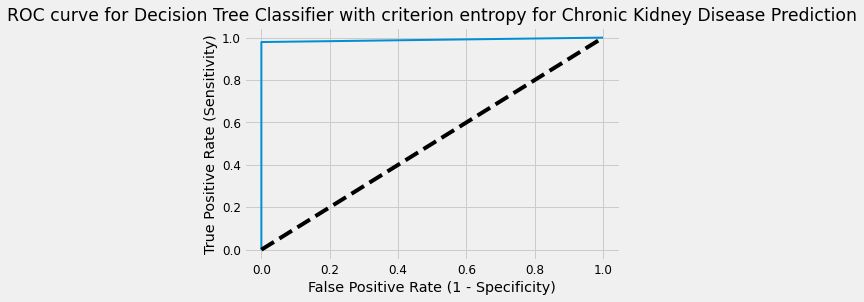

In [122]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree Classifier with criterion entropy for Chronic Kidney Disease Prediction')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [123]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9896


In [124]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Log Loss:', metrics.log_loss(y_test, y_pred_proba)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008333333333333333
Log Loss: 0.011787210317388441
Root Mean Squared Error: 0.09128709291752768


In [125]:
data_MAE.append(metrics.mean_absolute_error(y_test, y_pred))
data_logloss.append(metrics.log_loss(y_test, y_pred_proba))
data_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

SVM model using Linear Kernel function

In [126]:
X_train = X_Train
X_test = X_Test

In [127]:
cols = X_train.columns

In [128]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [129]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [130]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [131]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear',probability=True).fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('SVM Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

SVM Model accuracy with linear kernel : 0.983


In [132]:
data_acc['SVM'] =accuracy_score(y_test, y_pred)*100

In [133]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [134]:
y_pred_proba = linear_classifier.predict_proba(X_test)

In [135]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(accuracy_score(y_train, linear_classifier.predict(X_train))))

print('Test set score: {:.4f}'.format(accuracy_score(y_test, linear_classifier.predict(X_test))))

Training set score: 1.0000
Test set score: 0.9833


In [136]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[70  2]
 [ 0 48]]

True Positives(TP) =  70

True Negatives(TN) =  48

False Positives(FP) =  2

False Negatives(FN) =  0


<AxesSubplot:>

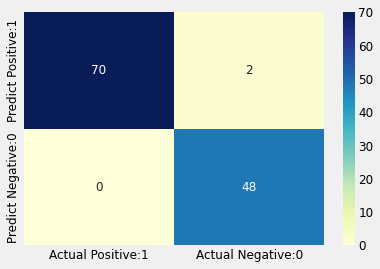

In [137]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [138]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [139]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print F-1 score
F1_score = 2*precision*recall / float(precision + recall)
print('F-1 Score : {0:0.4f}'.format(F1_score))

# print TPR score
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# print FPR score
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# print Specificity score
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9833
Classification error : 0.0167
Precision : 0.9722
Recall or Sensitivity : 1.0000
F-1 Score : 0.9859
True Positive Rate : 1.0000
False Positive Rate : 0.0400
Specificity : 0.9600


In [140]:
data_precision.append(precision)
data_recall.append(recall)
data_f1.append(F1_score)

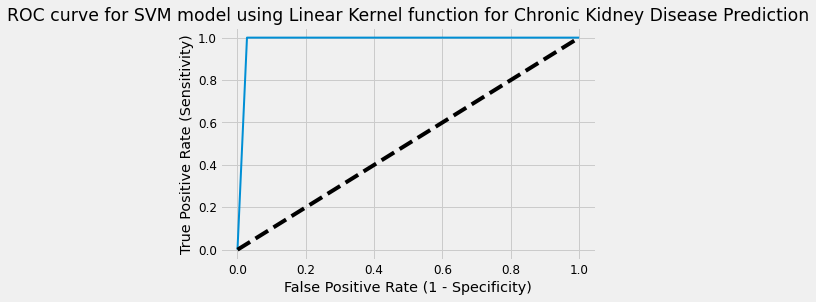

In [141]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM model using Linear Kernel function for Chronic Kidney Disease Prediction')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [142]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9861


In [143]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Log Loss:', metrics.log_loss(y_test, y_pred_proba))   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.016666666666666666
Log Loss: 0.0421676245216087
Root Mean Squared Error: 0.12909944487358055


In [144]:
data_MAE.append(metrics.mean_absolute_error(y_test, y_pred))
data_logloss.append(metrics.log_loss(y_test, y_pred_proba))
data_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

AdaBoost Classifier

In [145]:
X_train = X_Train
X_test = X_Test

In [146]:
cols = X_train.columns

In [147]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [148]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [149]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [150]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9583333333333334


In [151]:
data_acc['AdaBoost'] =accuracy_score(y_test, y_pred)*100

In [152]:
y_pred_proba = model1.predict_proba(X_test)

In [153]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(accuracy_score(y_train, model1.predict(X_train))))

print('Test set score: {:.4f}'.format(accuracy_score(y_test, model1.predict(X_test))))

Training set score: 1.0000
Test set score: 0.9583


In [154]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[72  0]
 [ 5 43]]

True Positives(TP) =  72

True Negatives(TN) =  43

False Positives(FP) =  0

False Negatives(FN) =  5


<AxesSubplot:>

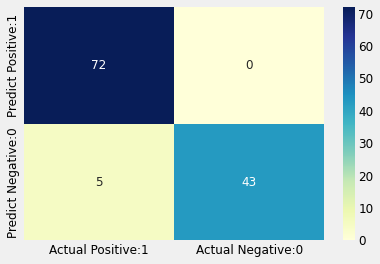

In [155]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [156]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [157]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print F-1 score
F1_score = 2*precision*recall / float(precision + recall)
print('F-1 Score : {0:0.4f}'.format(F1_score))

# print TPR score
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# print FPR score
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# print Specificity score
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9583
Classification error : 0.0417
Precision : 1.0000
Recall or Sensitivity : 0.9351
F-1 Score : 0.9664
True Positive Rate : 0.9351
False Positive Rate : 0.0000
Specificity : 1.0000


In [158]:
data_precision.append(precision)
data_recall.append(recall)
data_f1.append(F1_score)

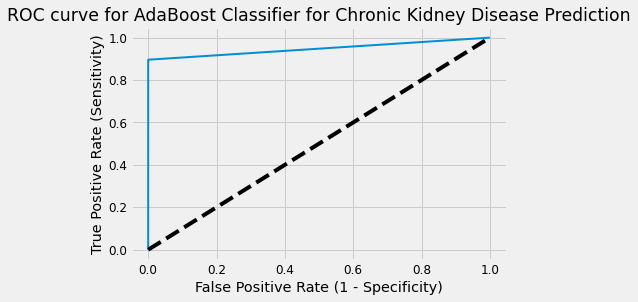

In [159]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for AdaBoost Classifier for Chronic Kidney Disease Prediction')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [160]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9479


In [161]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Log Loss:', metrics.log_loss(y_test, y_pred_proba))   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.041666666666666664
Log Loss: 0.10615823837784187
Root Mean Squared Error: 0.2041241452319315


In [162]:
data_MAE.append(metrics.mean_absolute_error(y_test, y_pred))
data_logloss.append(metrics.log_loss(y_test, y_pred_proba))
data_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [163]:
# load required classifer
from sklearn.ensemble import AdaBoostClassifier


# import Support Vector Classifier
from sklearn.svm import SVC


# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')


# create adaboost classifer object
# abc =AdaBoostClassifier(n_estimators=50, estimator=svc,learning_rate=0.1, random_state=0)


# # train adaboost classifer
# model2 = abc.fit(X_train, y_train)


# # predict the response for test dataset
# y_pred = model2.predict(X_test)


# # calculate and print model accuracy
# print("AdaBoost Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

In [164]:
# data_acc['AdaBoost with SVM'] =accuracy_score(y_test, y_pred)*100

In [165]:
# y_pred_proba = model2.predict_proba(X_test)

In [166]:
# # print the scores on training and test set

# print('Training set score: {:.4f}'.format(accuracy_score(y_train, model2.predict(X_train))))

# print('Test set score: {:.4f}'.format(accuracy_score(y_test, model2.predict(X_test))))

In [167]:
# # Print the Confusion Matrix and slice it into four pieces

# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)

# print('Confusion matrix\n\n', cm)

# print('\nTrue Positives(TP) = ', cm[0,0])

# print('\nTrue Negatives(TN) = ', cm[1,1])

# print('\nFalse Positives(FP) = ', cm[0,1])

# print('\nFalse Negatives(FN) = ', cm[1,0])

In [168]:
# # visualize confusion matrix with seaborn heatmap

# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [169]:
# TP = cm[0,0]
# TN = cm[1,1]
# FP = cm[0,1]
# FN = cm[1,0]

In [170]:
# # print classification accuracy
# classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
# print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# # print classification error
# classification_error = (FP + FN) / float(TP + TN + FP + FN)
# print('Classification error : {0:0.4f}'.format(classification_error))

# # print precision score
# precision = TP / float(TP + FP)
# print('Precision : {0:0.4f}'.format(precision))

# # print recall score
# recall = TP / float(TP + FN)
# print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# # print F-1 score
# F1_score = 2*precision*recall / float(precision + recall)
# print('F-1 Score : {0:0.4f}'.format(F1_score))

# # print TPR score
# true_positive_rate = TP / float(TP + FN)
# print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# # print FPR score
# false_positive_rate = FP / float(FP + TN)
# print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

# # print Specificity score
# specificity = TN / (TN + FP)
# print('Specificity : {0:0.4f}'.format(specificity))

In [171]:
# data_precision.append(precision)
# data_recall.append(recall)
# data_f1.append(F1_score)

In [172]:
# # plot ROC Curve
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plt.figure(figsize=(6,4))
# plt.plot(fpr, tpr, linewidth=2)
# plt.plot([0,1], [0,1], 'k--' )
# plt.rcParams['font.size'] = 12
# plt.title('ROC curve for AdaBoost Classifier with SVC Base Estimator for Chronic Kidney Disease Prediction')

# plt.xlabel('False Positive Rate (1 - Specificity)')

# plt.ylabel('True Positive Rate (Sensitivity)')

# plt.show()

In [173]:
# # compute ROC AUC
# from sklearn.metrics import roc_auc_score
# ROC_AUC = roc_auc_score(y_test, y_pred)

# print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [174]:
# from sklearn import metrics  
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Log Loss:', metrics.log_loss(y_test, y_pred_proba)) 
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [175]:
# data_MAE.append(metrics.mean_absolute_error(y_test, y_pred))
# data_logloss.append(metrics.log_loss(y_test, y_pred_proba))
# data_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Summary

In [176]:
data_acc

{'Naive Bayes': 95.83333333333334,
 'KNN': 98.33333333333333,
 'Decision Tree': 99.16666666666667,
 'SVM': 98.33333333333333,
 'AdaBoost': 95.83333333333334}

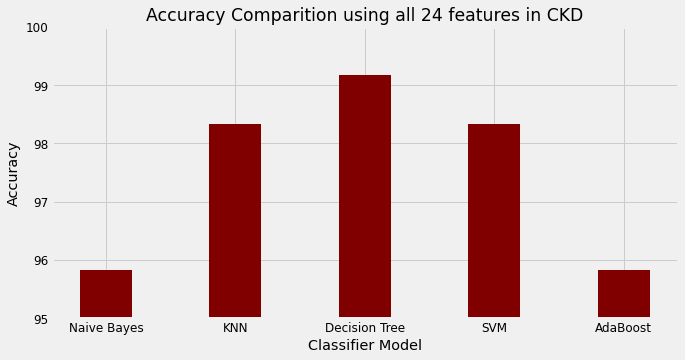

In [177]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

courses = list(data_acc.keys())
values = list(data_acc.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.ylim(95, 100)
plt.xlabel("Classifier Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparition using all 24 features in CKD")
plt.show()

In [178]:
print(data_precision)
print(data_recall)
print(data_f1)

[0.9444444444444444, 0.9722222222222222, 1.0, 0.9722222222222222, 1.0]
[0.9855072463768116, 1.0, 0.9863013698630136, 1.0, 0.935064935064935]
[0.9645390070921985, 0.9859154929577464, 0.993103448275862, 0.9859154929577464, 0.9664429530201343]


In [179]:
print(data_MAE)
print(data_logloss)
print(data_RMSE)

[0.041666666666666664, 0.016666666666666666, 0.008333333333333333, 0.016666666666666666, 0.041666666666666664]
[1.2243243022403107, 0.600727556485286, 0.011787210317388441, 0.0421676245216087, 0.10615823837784187]
[0.2041241452319315, 0.12909944487358055, 0.09128709291752768, 0.12909944487358055, 0.2041241452319315]
